In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.patheffects as path_effects
import os
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib import ticker

In [220]:
qcode = "HGP_100_4.qcode"
# qcode = "HGP_C422_200_4.qcode"

def ler_per_round(ax, qcode, t=0):
    f_path = f"../../results/parameter_testing/"
    f_name = f"{qcode}.res"

    df = pd.read_csv(f_path+f_name)
    # df = df[(df['r'] % 5 == 0)]
    # df = df[(df['r'] > 20)]
    df['p_error'] = 1 - df['p_log']
    df['p_std_dev'] = np.sqrt(df['p_error'] * df['p_log'] / df['num_test'])

    df['p_error'].replace(to_replace=0, value=0.5, inplace=True)

    df['ler_per_round'] = 1 - (1 - df['p_error'])**(1/df['r'])
    df['error_bars'] = (1 - df['p_error'])**(1/(df['r']-1)) * df['p_std_dev'] / df['r']

    marker = 's' if t else 'o'
    ax.errorbar(df['r'], df['ler_per_round'], df['error_bars'], label=qcode, marker=marker, ls="none")
    # ax.scatter(df['r'], df['ler_per_round'], label=qcode, marker='o', s=5)


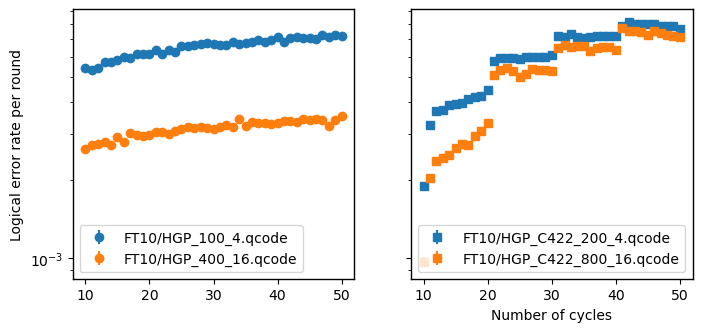

In [266]:
# plt.rc('font', family='serif')
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['axes.linewidth'] = 1

fig, ax = plt.subplots(1, 2, figsize=(8,3.5), sharey=True)

# ler_per_round(ax[0], "cat10/HGP_100_4.qcode")
# ler_per_round(ax, "HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats0/HGP_C422_200_4.qcode")
# ler_per_round(ax, "cats10/HGP_C422_200_4.qcode")
folder = "FT10"
# folder2 = "extra/20"

ler_per_round(ax[0],f"{folder}/HGP_100_4.qcode")
ler_per_round(ax[0], f"{folder}/HGP_400_16.qcode")

ler_per_round(ax[1], f"{folder}/HGP_C422_200_4.qcode", 1)
ler_per_round(ax[1], f"{folder}/HGP_C422_800_16.qcode", 1)

# ler_per_round(ax[0], f"{folder2}/HGP_C422_200_4.qcode", 1)
# ler_per_round(ax[0], f"{folder2}/HGP_C422_800_16.qcode", 1)

ax[0].legend()
ax[1].legend()

ax[0].set_ylabel("Logical error rate per round")
ax[1].set_xlabel("Number of cycles")

ax[0].set_yscale('log')
ax[1].set_yscale('log')
